# Clusteing
In Clustering you don’t know what you are looking for, and you are trying to identify some segments or clusters in your data. When you use clustering algorithms on your dataset, unexpected things can suddenly pop up like structures, clusters and groupings you would have never thought of otherwise.

## K-Means Clustering
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data(i.e. data without defined categories or groups). The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.
Aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean

In [1]:
#dataset is about mall customers, each row corresponds to a customer, spending score tells how much time each customer spends, higher the score, higher is the time a customer spends in the mall.
#it's done to identify some patterns, we will be created a dependent variable with the help of optimal number of clusters
#each of these clusters will be a certain group of customers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values   #we don't have the dependent variable, so we are just having 'x'
#used just two features for predicting the clusters so as to see them clearly while plotting 

C:\Users\shubham.kamble1\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


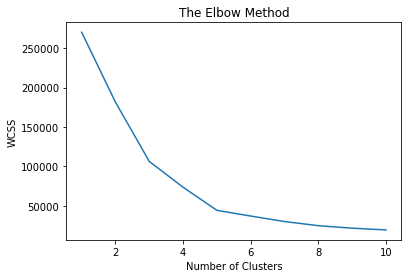

In [4]:
#using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for each in range(1, 11):   #run the algo with different number of clusters i.e. each
    kmeans = KMeans(n_clusters = each, init = 'k-means++', random_state = 42)   #we want each number from 1-10 in order to plot elbow method graph
    #to avoid random initialization trap we use 'init' parameter with value as 'k-means++', random_state value can be any number
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)   #calculates the wcss value i.e. squared distance between each point and centroid
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#optimal number of cluster is 5

In [6]:
#training the kmeans model on dataset

kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 42)
y_pred = kmeans.fit_predict(x)   #fit the model and then predict and return the dependent variable which we will be creating taking five different values
print(y_pred)   #this is the dependent variable created with number of cluster of each customer in the dataset

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


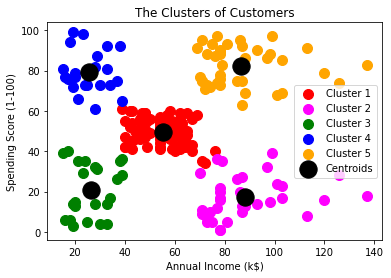

In [14]:
#visualising the clusters

#x[y_pred==0,0], here y_pred==0 means selecting the customers with '0' value from the above y_pred array 
#0 means selecting the 0th column of the 'x' and 1 means selecting the 1st column from the 'x'
#s is the size which is 100 for displaying big enough points
plt.scatter(x[y_pred==0, 0],x[y_pred==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_pred==1, 0],x[y_pred==1, 1], s=100, c='magenta', label='Cluster 2')
plt.scatter(x[y_pred==2, 0],x[y_pred==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_pred==3, 0],x[y_pred==3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(x[y_pred==4, 0],x[y_pred==4, 1], s=100, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
#cluster_centres_ is 2d array in which rows corresponds to diferent 'centroids' and columns corresponds to the
#'x-coordinates and y_coordinates of these cluster_centers'i.e. 0(1st column of x) and 1(2nd column of x)

plt.title('The Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()